In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('/content/car_evaluation.csv', header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [26]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
df.duplicated().sum()

0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [29]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [30]:
for col in df.columns:
  print(df[col].value_counts())
  print('\n')

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64


doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64


persons
2       576
4       576
more    576
Name: count, dtype: int64


lug_boot
small    576
med      576
big      576
Name: count, dtype: int64


safety
low     576
med     576
high    576
Name: count, dtype: int64


class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64




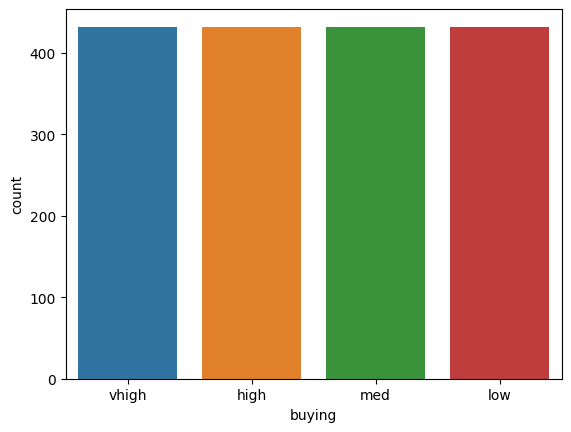

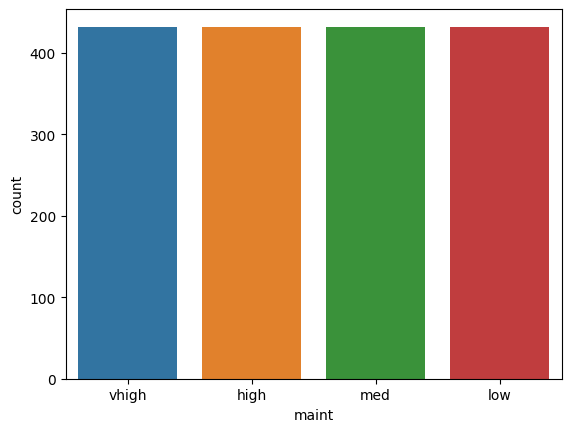

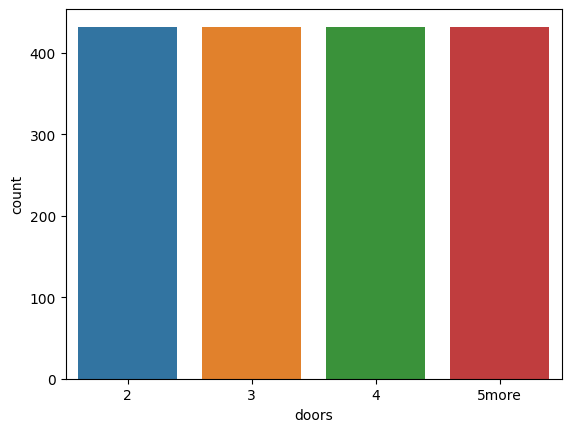

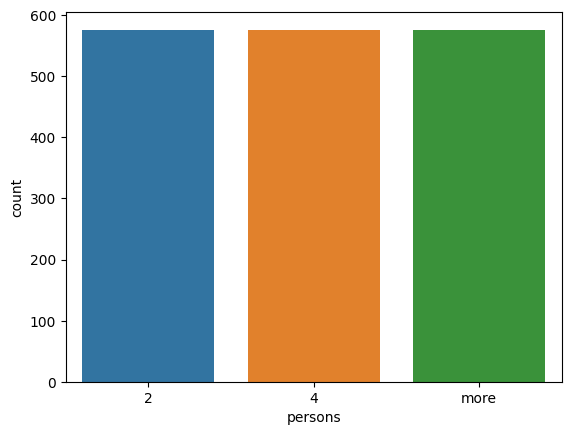

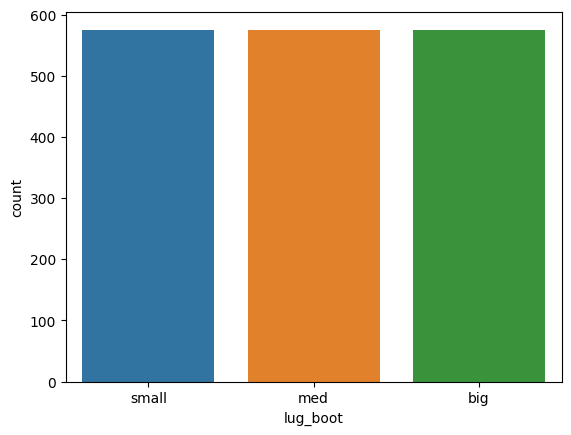

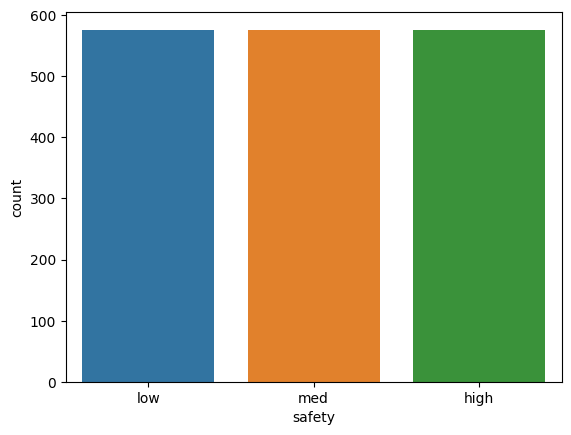

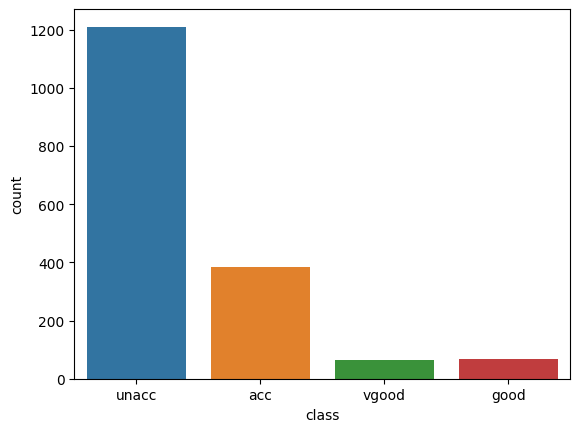

In [31]:
for col in df.columns:
  sns.countplot(x = col, data = df, hue = col)
  plt.show()

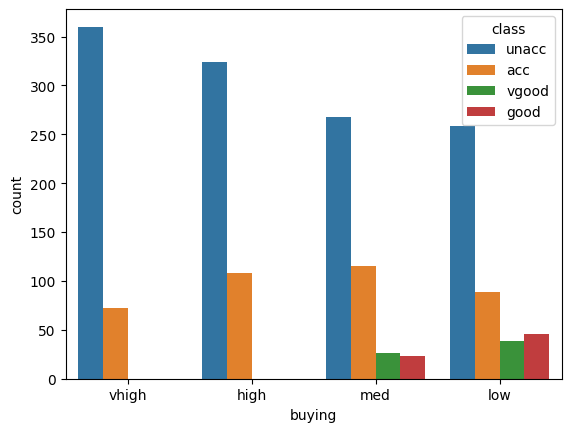

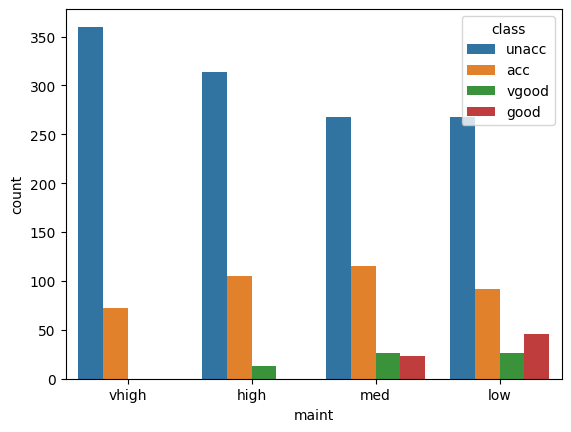

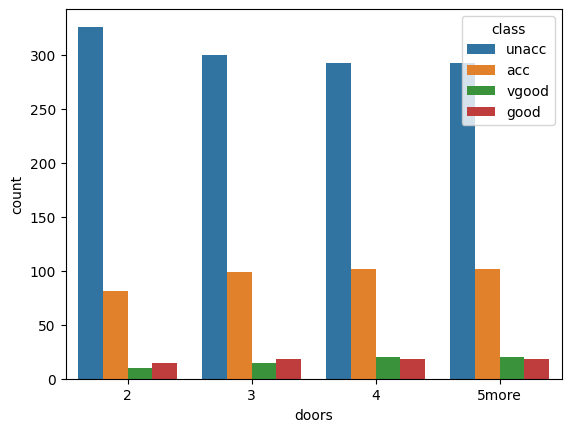

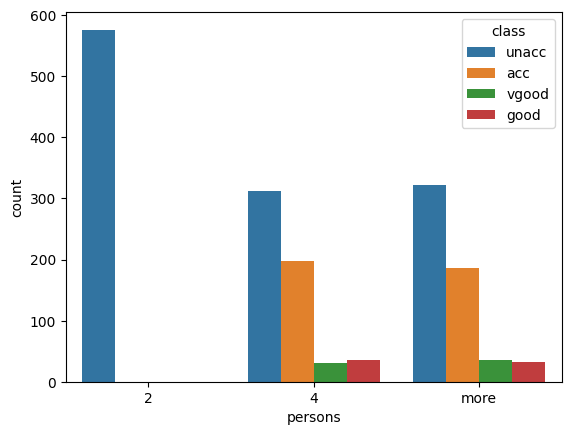

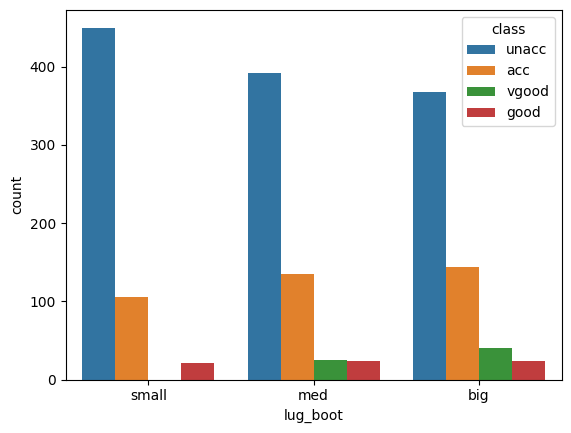

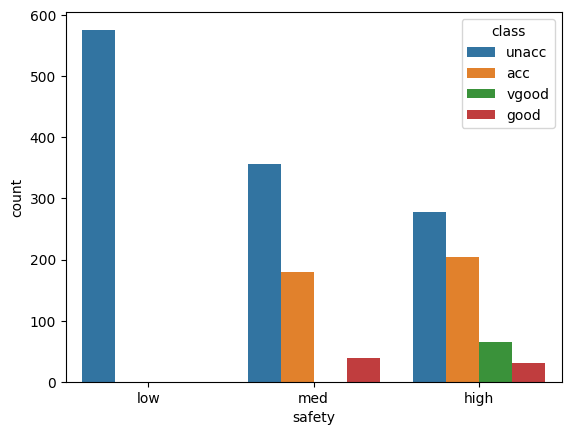

In [32]:
for col in df.columns:
  if col != 'class':
    sns.countplot(x = col, data = df, hue = 'class')
    plt.show()

In [33]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [34]:
cat_columns = df.select_dtypes(include = 'object').drop(columns = 'class').columns.tolist()
cat_columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [35]:
df = pd.get_dummies(df, columns = cat_columns, dtype = int)
df.head()

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,unacc,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])
df.head()

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,2,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,2,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,2,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,1,0,0
3,2,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4,2,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [37]:
X = df.drop(columns = 'class')
y = df['class']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


dt_model = DecisionTreeClassifier()
ab_model = AdaBoostClassifier(random_state = 42)
gb_model = GradientBoostingClassifier(random_state = 42)
nb_model = MultinomialNB()

def build_evaluate_models(x_train, x_test, y_train, y_test):
  models = [dt_model, ab_model, gb_model, nb_model]
  model_names = ['Decision Tree', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']
  for model, name in zip(models, model_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'macro')
    recall = recall_score(y_test, y_pred, average = 'macro')
    f1 = f1_score(y_test, y_pred, average = 'macro')
    confusion = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

build_evaluate_models(X_train, X_test, y_train, y_test)

Decision Tree Metrics:
Accuracy: 0.9797687861271677
Precision: 0.9636892712550608
Recall: 0.9772727272727273
F1 Score: 0.9688723342097575
Confusion Matrix:
[[ 70   2   5   0]
 [  0  14   0   0]
 [  0   0 242   0]
 [  0   0   0  13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        77
           1       0.88      1.00      0.93        14
           2       0.98      1.00      0.99       242
           3       1.00      1.00      1.00        13

    accuracy                           0.98       346
   macro avg       0.96      0.98      0.97       346
weighted avg       0.98      0.98      0.98       346



AdaBoost Metrics:
Accuracy: 0.8352601156069365
Precision: 0.801268115942029
Recall: 0.7642811733720825
F1 Score: 0.7575388828585758
Confusion Matrix:
[[ 30   6  40   1]
 [  0  14   0   0]
 [  6   0 236   0]
 [  4   0   0   9]]
Classification Report:
              precision    recall  f1-score   support

  